<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/22_Noy_2024_home_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check the `Chance of Admit` against the `Research` using chi square tests on the given `admissions` dataset.

## Import necessary library

In [ ]:
import pandas as pd
from scipy.stats import chisquare, chi2_contingency, f_oneway
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import express as px
import plotly.figure_factory as ff

## Load `admissions.csv` as *DataFrame.*

In [ ]:
data = pd.read_csv('admissions.csv')
data.head(1)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92


## Test

### Check corealtion `Chance of Admit` by all columns.

<Axes: >

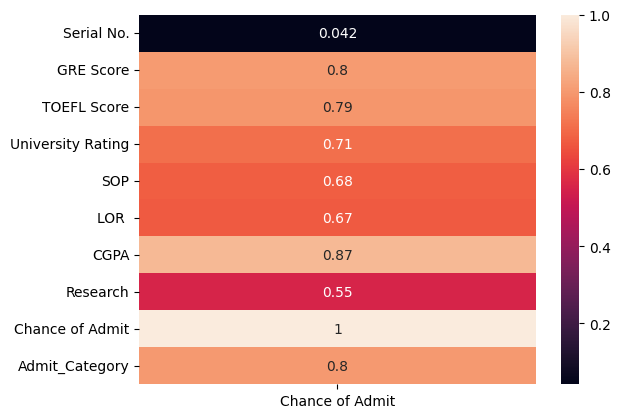

In [ ]:
correlations = data.corr()['Chance of Admit']
sns.heatmap(correlations.to_frame(), annot=True)

### Check.

### check mean in group.

In [ ]:
data.groupby('Research')['Chance of Admit'].mean()

,Chance of Admit
Research,
0,0.637680
1,0.795982


The average value of `Chance of Admit` by `Research` groups shows a significant difference, with the probability appearing higher when `Research = 1`.

### Split data to A/B group.

In [ ]:
group_A = data[data['Research'] == 0]['Chance of Admit']
group_B = data[data['Research'] == 1]['Chance of Admit']

### Check group.

In [ ]:
count_A = group_A.shape[0]
count_B = group_B.shape[0]

print("Group 0 (A) - Count:", count_A)
print("Group 1 (B) - Count:", count_B)

Group 0 (A) - Count: 181
Group 1 (B) - Count: 219


In [ ]:
std_A = round(group_A.std(), 3)
std_B = round(group_B.std(), 3)
mean_A = group_A.mean().round(3)
mean_B = group_B.mean().round(3)
median_A = round(group_A.median(), 3)
median_B = round(group_B.median(), 3)
mode_A = group_A.mode()[0].round(3)
mode_B = group_B.mode()[0].round(3)

print("Group 0 (A) - Mean:", mean_A, "Std Dev:", std_A, "Median:", median_A, "Mode:", mode_A)
print("Group 1 (B) - Mean:", mean_B, "Std Dev:", std_B, "Median:", median_B, "Mode:", mode_B)

Group 0 (A) - Mean: 0.638 Std Dev: 0.114 Median: 0.65 Mode: 0.64
Group 1 (B) - Mean: 0.796 Std Dev: 0.123 Median: 0.8 Mode: 0.94


In all mathematical metrics, the case where `Research = 1` is superior.

### T-test.

In [62]:
t_stat, p_value = ttest_ind(group_A, group_B)

print("T-Statistic:", t_stat)
print("P-value:", p_value)

T-Statistic: -13.248168764786403
P-value: 1.918173380692434e-33


### CH squire.

In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(pd.crosstab(data['Research'], data['Chance of Admit']))

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

Chi-Square Statistic: 175.37126371830163
P-value: 1.761816627516827e-13


Using `ttest_ind`, we can also observe a difference between the means, and this is statistically significant.

### ANOVA one way

In [ ]:
f_value, p_value = f_oneway(group_A, group_B)

print("F-value:", f_value)
print("P-value:", p_value)

F-value: 175.51397562026244
P-value: 1.9181733806927185e-33


Using `ANOVA one way`, we can also observe a difference between the means, and this is statistically significant.

### Vsualisation.

In [ ]:
fig = px.box(
    data,
    x='Research',
    y='Chance of Admit',
    color='Research',
    title='Chance of Admit by Research.',
)
fig.show()

In [ ]:
hist_data = [group_A, group_B]
group_labels = ['Research 0', 'Research 1']

fig = ff.create_distplot(
    hist_data,
    group_labels,
    bin_size=0.05,
    show_hist=True,
    show_rug=False
)

fig.update_layout(
    title='Chance of Admit and Research Group',
    xaxis_title='Chance of Admit',
    yaxis_title='Frequency',
    legend_title='Research'
)
fig.show()

We can also shows that the case where `Research = 1` is superior.

There is a relationship between `Research` and `Chance of Admit`, and the case where `Research = 1` demonstrates an advantage.